In [15]:
import os
import pandas as pd
import pyreadr
from pathlib import Path

# used in .py file
# script_directory = os.path.dirname(os.path.abspath(__file__))
script_directory = os.getcwd()
file_path = os.path.join(script_directory, "5v_cleandf 2.rdata")

print("1")
result = pyreadr.read_r(file_path) 
data = result["df"]
data.head()

1


,dep_name,esi,age,gender,ethnicity,race,lang,religion,maritalstatus,employstatus,...,cc_vaginaldischarge,cc_vaginalpain,cc_weakness,cc_wheezing,cc_withdrawal-alcohol,cc_woundcheck,cc_woundinfection,cc_woundre-evaluation,cc_wristinjury,cc_wristpain
0,B,4,40,Male,Hispanic or Latino,White or Caucasian,English,None,Single,Full Time,...,0,0,0,0,0,0,0,0,0,0
1,B,4,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
2,B,2,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
3,A,2,66,Male,Hispanic or Latino,Native Hawaiian or Other Pacific Islander,English,Pentecostal,Married,Not Employed,...,0,0,0,0,0,0,0,0,0,0
4,A,3,84,Female,Hispanic or Latino,Other,Other,Pentecostal,Widowed,Retired,...,0,0,0,0,0,0,0,0,0,0


In [16]:
data.describe()
# Check for null values
null_values = data.isnull()
# List the index where null values exist
rows_with_null = data[null_values.any(axis=1)]
# no issing values
null_indices = rows_with_null.index
print("\nIndices with Null Values:")
print(null_indices)


Indices with Null Values:
RangeIndex(start=0, stop=560486, step=1)


In [27]:
data.dtypes
numerical_vars = data.select_dtypes(exclude='category')
categorical_vars = data.select_dtypes(include='category')
binary_vars = [col for col in data.columns if set(data[col].unique()) == {0, 1}]

In [29]:
print(categorical_vars.columns)
print(len(binary_vars))

Index(['dep_name', 'esi', 'gender', 'ethnicity', 'race', 'lang', 'religion',
       'maritalstatus', 'employstatus', 'insurance_status', 'disposition',
       'arrivalmode', 'arrivalmonth', 'arrivalday', 'arrivalhour_bin',
       'previousdispo'],
      dtype='object')
292


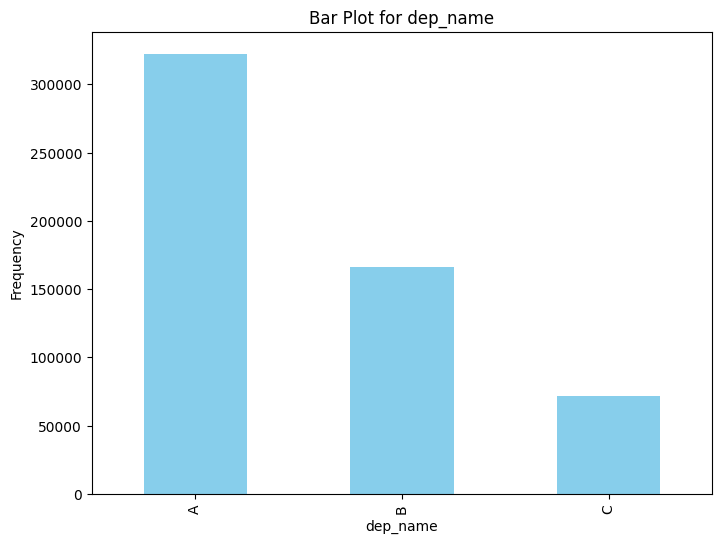

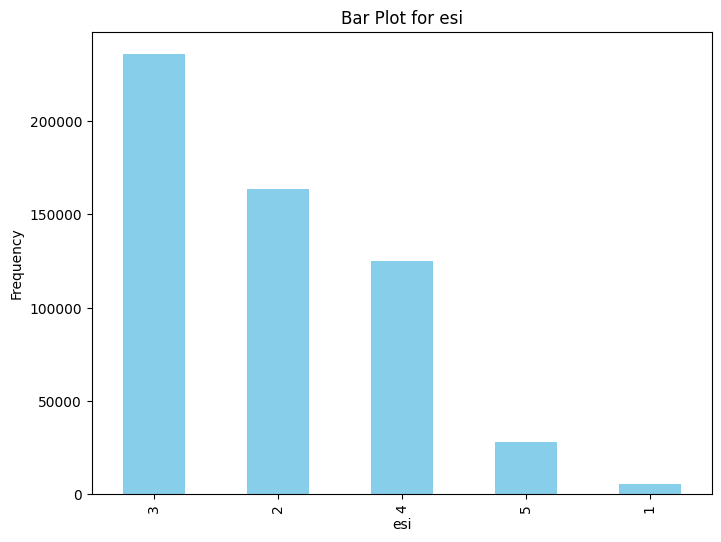

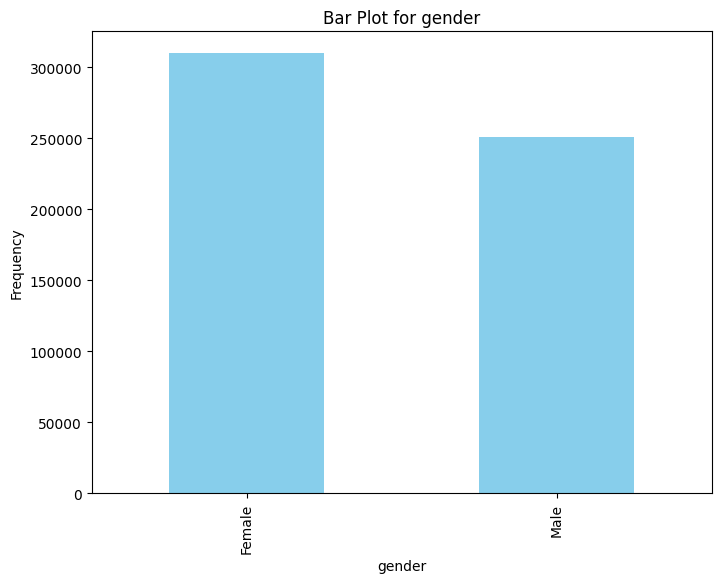

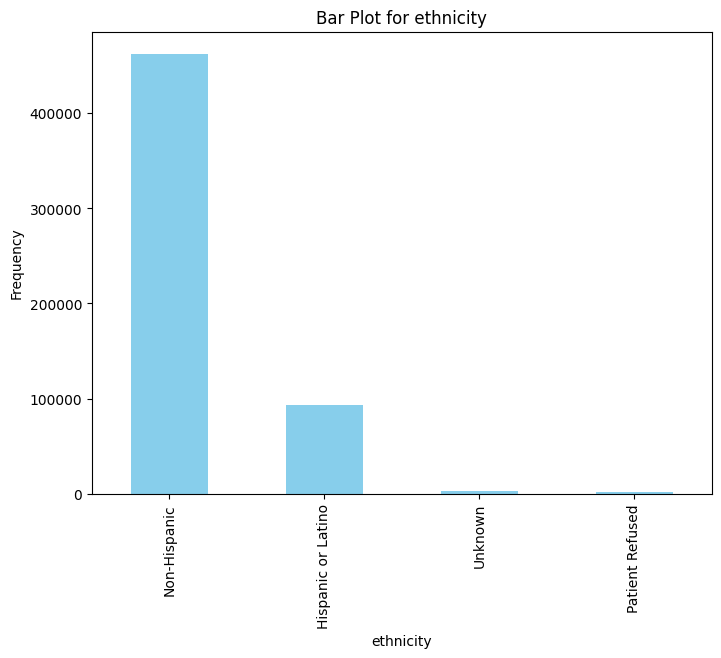

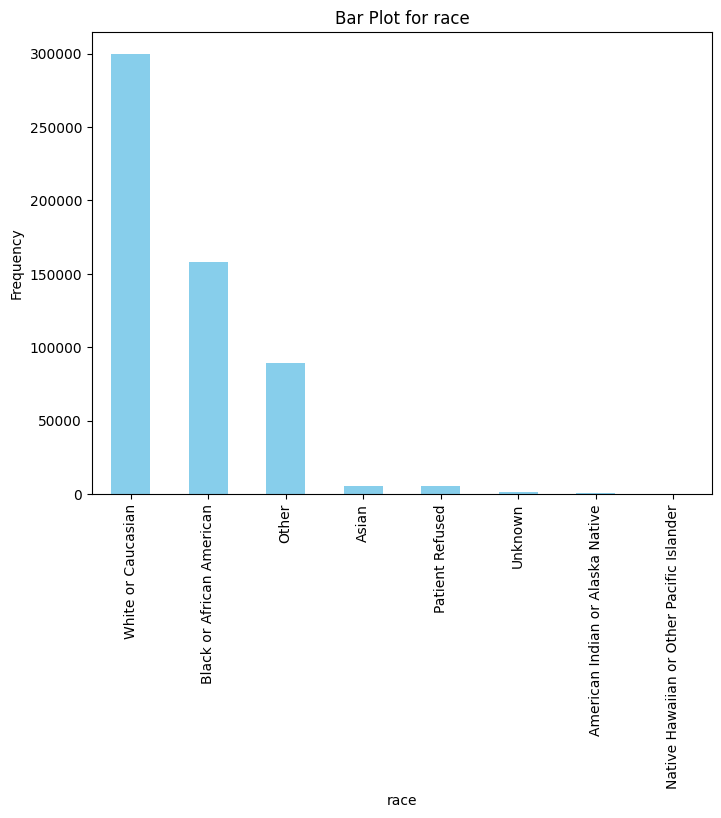

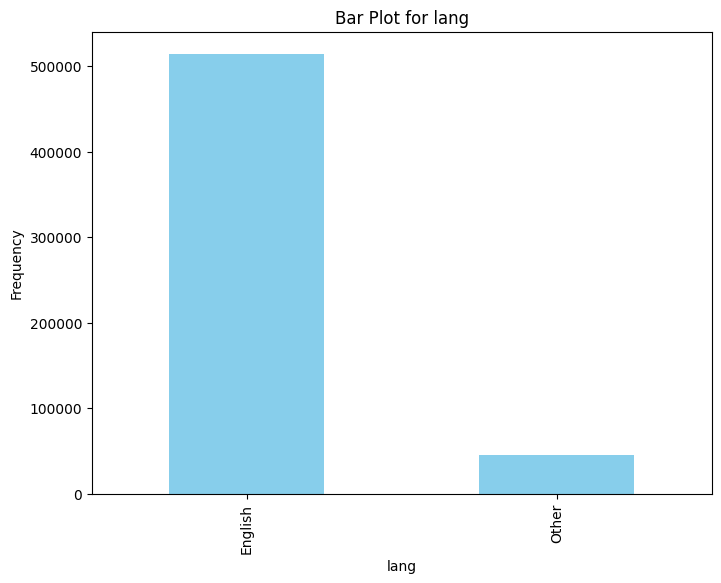

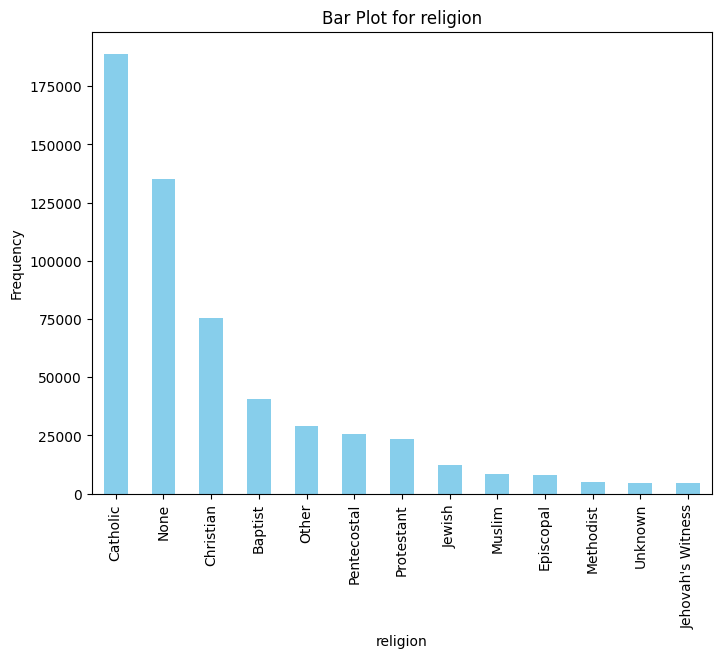

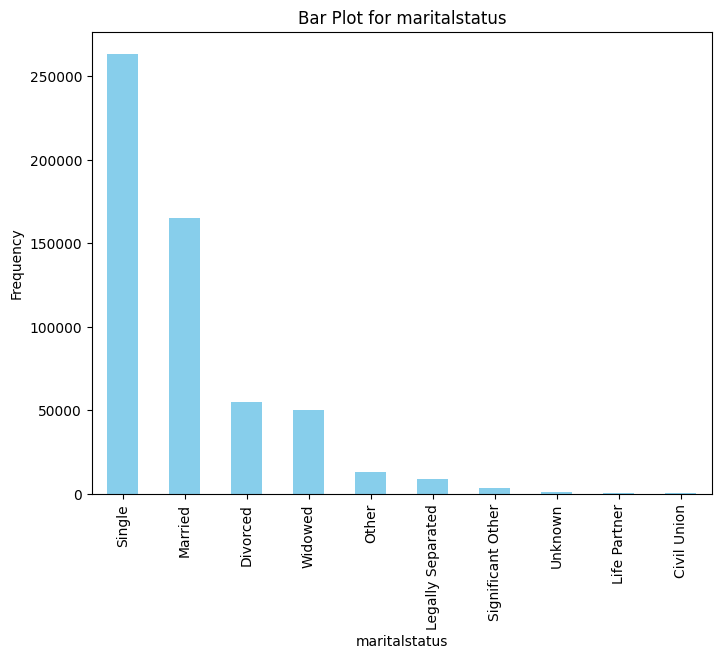

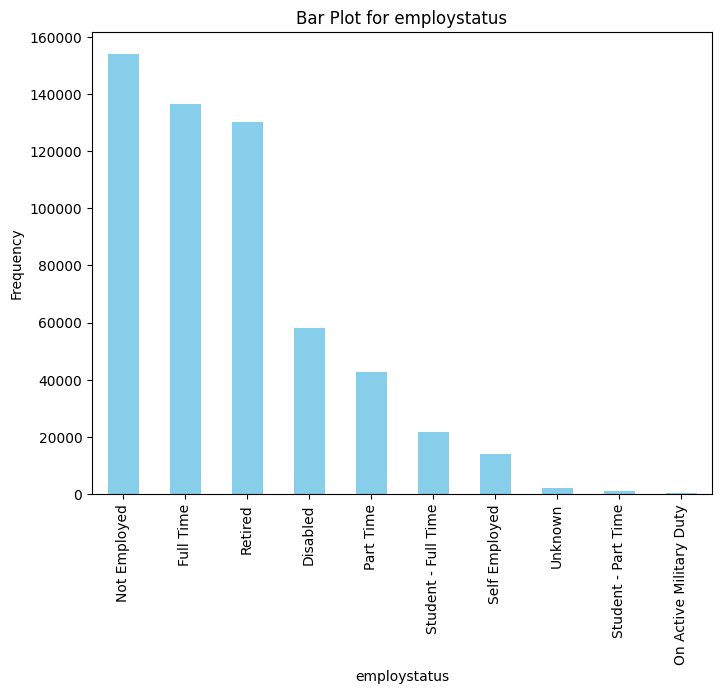

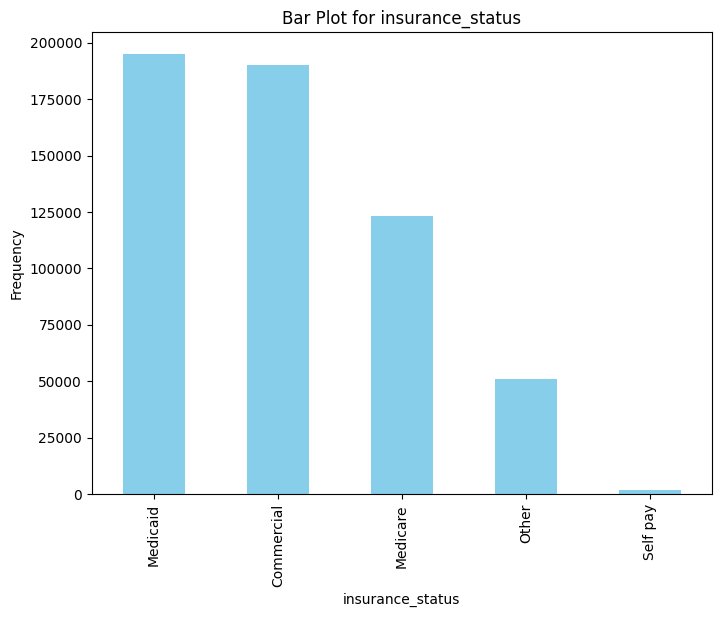

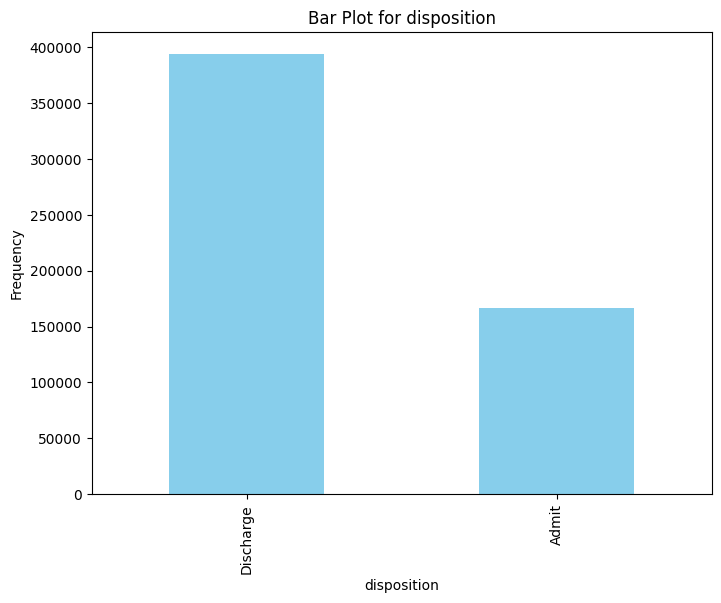

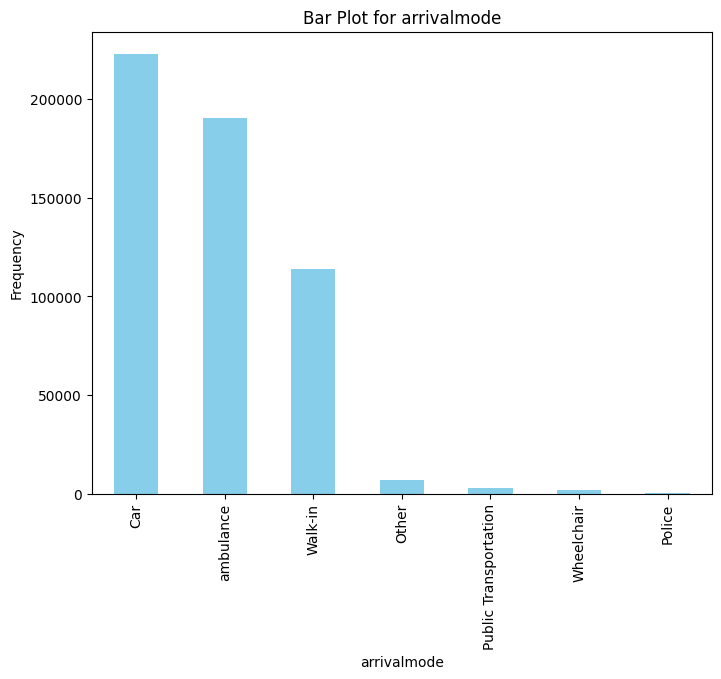

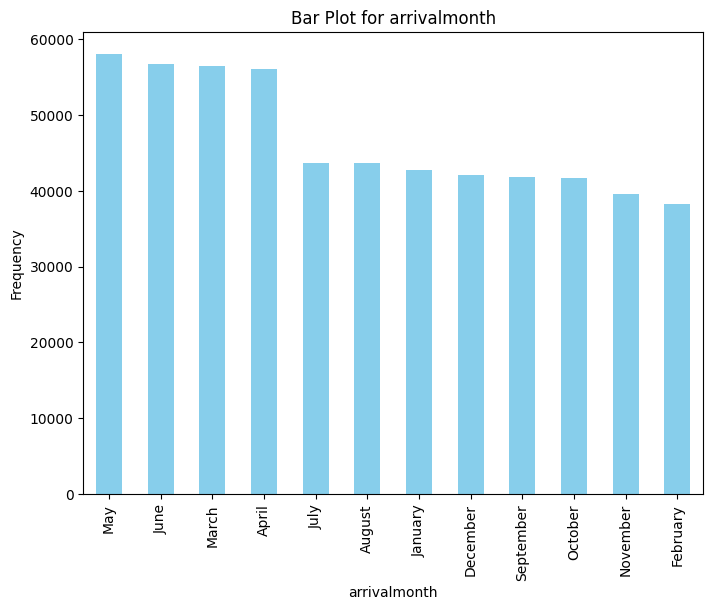

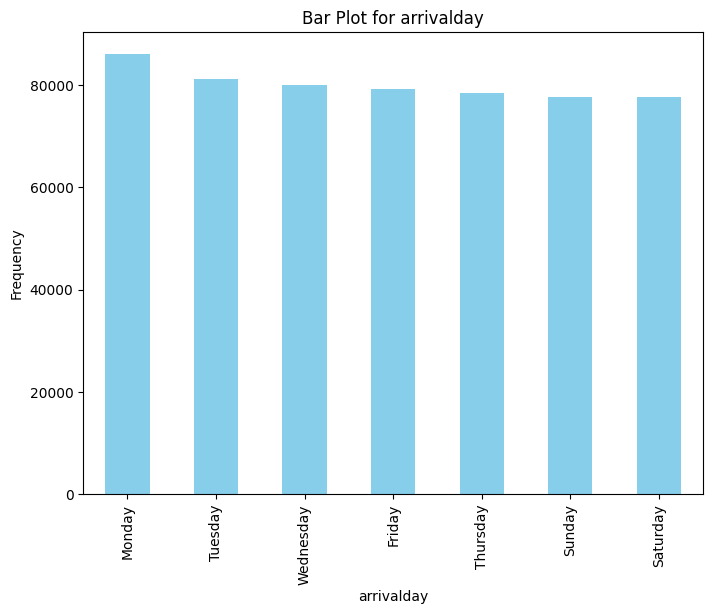

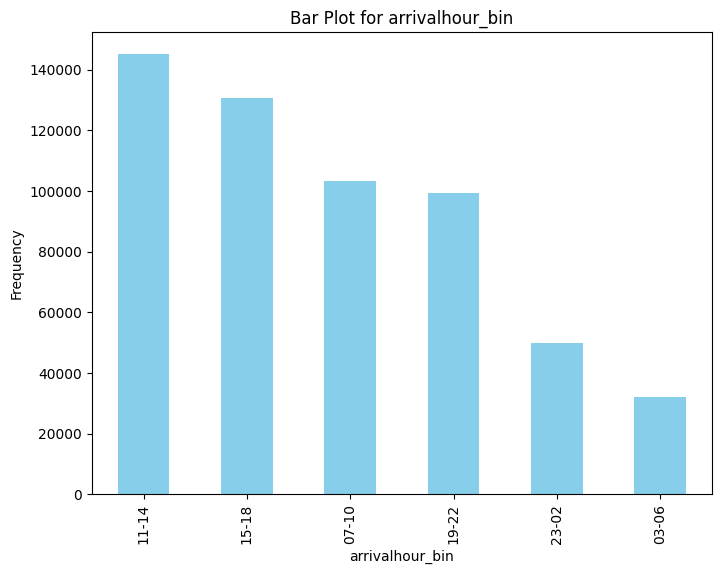

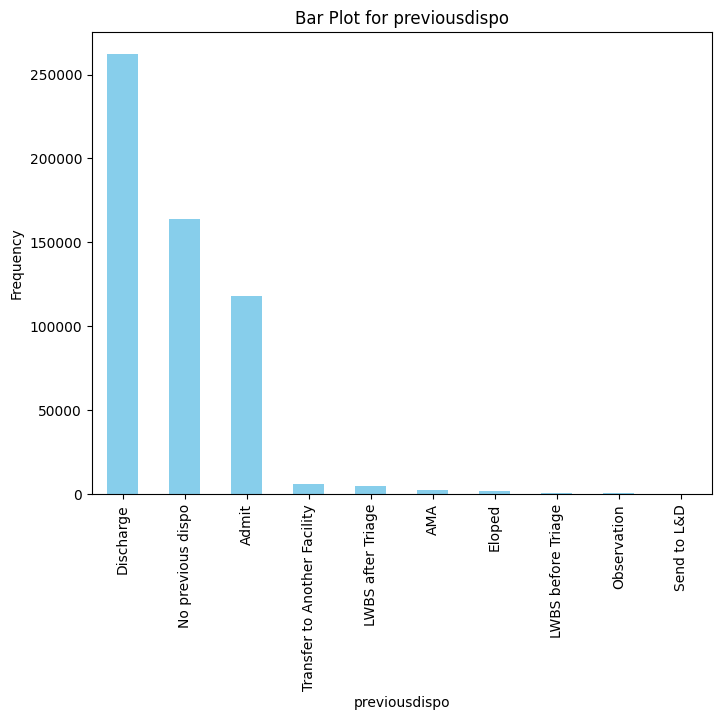

In [19]:
import matplotlib.pyplot as plt
for column in categorical_vars.columns:
    plt.figure(figsize=(8, 6))
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [25]:
data.shape

(560486, 972)

In [32]:
data[['dep_name','arrivalday']].head(100)

,dep_name,arrivalday
0,B,Tuesday
1,B,Tuesday
2,B,Thursday
3,A,Saturday
4,A,Tuesday
...,...,...
95,C,Friday
96,C,Wednesday
97,B,Tuesday
98,A,Tuesday
